In [4]:
!pip install -Uqq fastbook
!pip install -Uq fastai

     |████████████████████████████████| 720 kB 6.9 MB/s 
     |████████████████████████████████| 46 kB 3.9 MB/s 
     |████████████████████████████████| 1.2 MB 46.9 MB/s 
     |████████████████████████████████| 189 kB 71.2 MB/s 
     |████████████████████████████████| 56 kB 6.2 MB/s 
     |████████████████████████████████| 51 kB 411 kB/s 


In [17]:
from fastbook import *
path = untar_data(URLs.PETS)

pets = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files,
                 splitter=RandomSplitter(seed=42),
                 get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'),'name'),
                 item_tfms=Resize(460),
                 batch_tfms=aug_transforms(size=224, min_scale=0.75))

dls = pets.dataloaders(path/"images")

learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(2)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.499462,0.318870,0.098106,01:10


epoch,train_loss,valid_loss,error_rate,time
0,0.544697,0.303638,0.099459,01:13
1,0.327288,0.242226,0.074425,01:13


[('Ragdoll', 'Birman', 8),
 ('american_pit_bull_terrier', 'american_bulldog', 5)]

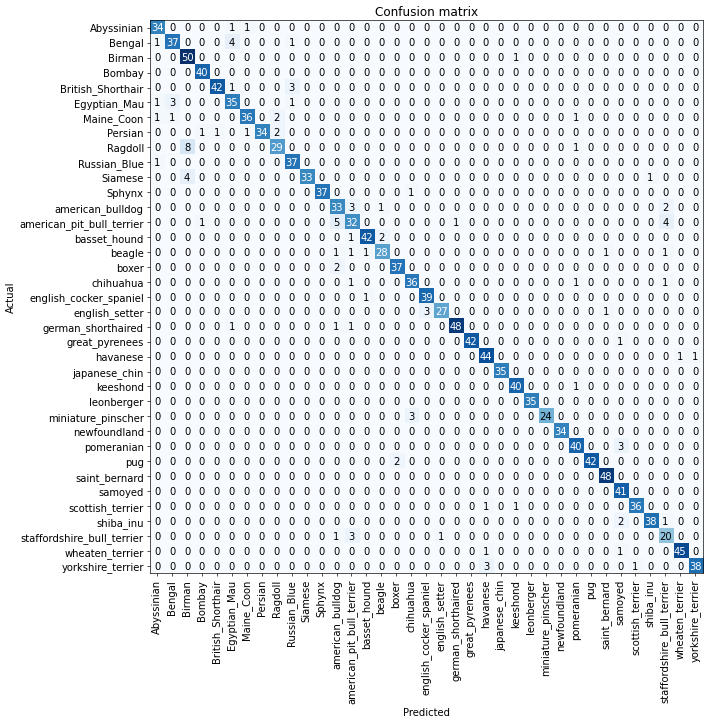

In [42]:
x, y = dls.one_batch()

preds,_ = learn.get_preds(dl=[(x,y)])
preds[0]

interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)
interp.most_confused(min_val=5)


In [31]:
inputs = torch.tensor([100, 400.23, 1.3, -300]).sigmoid()
targets = torch.tensor([0, 1, 1, 0])

print(torch.tensor([100, 400.23, 1.3, -300]))
torch.where(targets == 1, 1 - inputs, inputs)

tensor([ 100.0000,  400.2300,    1.3000, -300.0000])


tensor([1.0000, 0.0000, 0.2142, 0.0000])

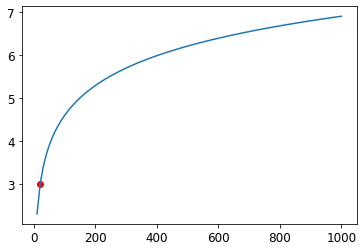

In [46]:

plot_function(torch.log, min=0, max=1000)
plt.scatter(20, 3, color='red')

# Why cross-entropy-loss and not squared residuals ?

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


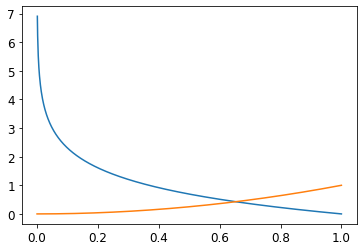

In [57]:
x = np.linspace(0, 1, 1000)
entropy = -np.log(x)
quadratic = x**2

fig, ax = plt.subplots()
ax.plot(x, entropy)
ax.plot(x, quadratic)

Look at the figures above.

Because backpropagation depends on calculating the gradients after a bad prediction the network will modify its parameters more than using sum of squared residuals.
That is because backpropagation uses the slope of the function to adjust the weights and biases